In [2]:
# Load the installed packages
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using MLJ
using Random
using StatsBase
using Distributions, HypothesisTests

In [3]:
dataset = DataFrame(CSV.File(download("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")));

In [4]:
first(dataset,5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure
,Float64,Int64,Int64,Int64,Int64,Int64
1,75.0,0,582,0,20,1
2,55.0,0,7861,0,38,0
3,65.0,0,146,0,20,0
4,50.0,1,111,0,20,0
5,65.0,1,160,1,20,0


In [5]:
names(dataset)

13-element Vector{String}:
 "age"
 "anaemia"
 "creatinine_phosphokinase"
 "diabetes"
 "ejection_fraction"
 "high_blood_pressure"
 "platelets"
 "serum_creatinine"
 "serum_sodium"
 "sex"
 "smoking"
 "time"
 "DEATH_EVENT"

In [6]:
println(size(dataset))

describe(dataset)

(299, 13)


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,60.8339,40.0,60.0,95.0,0,Float64
2,anaemia,0.431438,0,0.0,1,0,Int64
3,creatinine_phosphokinase,581.839,23,250.0,7861,0,Int64
4,diabetes,0.41806,0,0.0,1,0,Int64
5,ejection_fraction,38.0836,14,38.0,80,0,Int64
6,high_blood_pressure,0.351171,0,0.0,1,0,Int64
7,platelets,263358.0,25100.0,262000.0,850000.0,0,Float64
8,serum_creatinine,1.39388,0.5,1.1,9.4,0,Float64
9,serum_sodium,136.625,113,137.0,148,0,Int64


In [7]:
schema(dataset)

┌──────────────────────────┬─────────┬────────────┐
│ _.names                  │ _.types │ _.scitypes │
├──────────────────────────┼─────────┼────────────┤
│ age                      │ Float64 │ Continuous │
│ anaemia                  │ Int64   │ Count      │
│ creatinine_phosphokinase │ Int64   │ Count      │
│ diabetes                 │ Int64   │ Count      │
│ ejection_fraction        │ Int64   │ Count      │
│ high_blood_pressure      │ Int64   │ Count      │
│ platelets                │ Float64 │ Continuous │
│ serum_creatinine         │ Float64 │ Continuous │
│ serum_sodium             │ Int64   │ Count      │
│ sex                      │ Int64   │ Count      │
│ smoking                  │ Int64   │ Count      │
│ time                     │ Int64   │ Count      │
│ DEATH_EVENT              │ Int64   │ Count      │
└──────────────────────────┴─────────┴────────────┘
_.nrows = 299


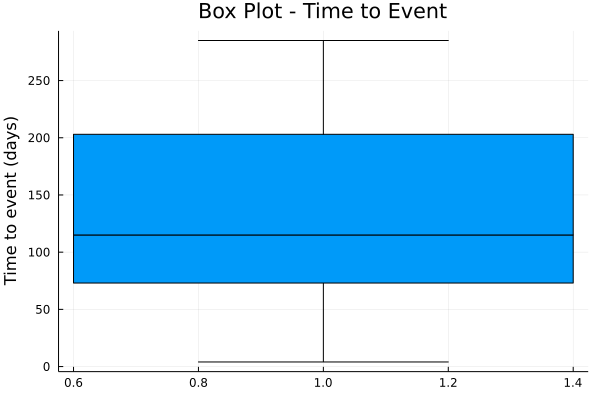

In [8]:
boxplot(dataset.time, title = "Box Plot - Time to Event", ylabel = "Time to event (days)", legend = false)

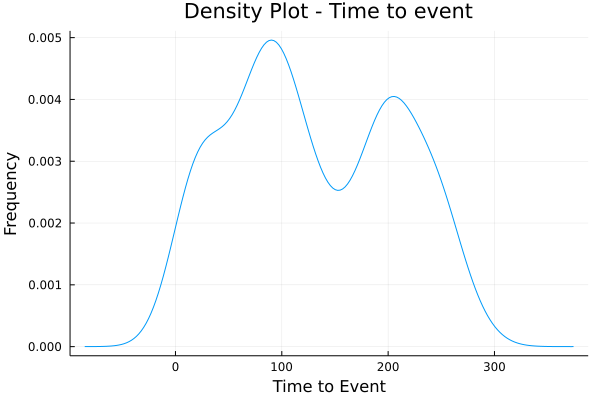

In [9]:
density(dataset.time , title = "Density Plot - Time to event", ylabel = "Frequency", xlabel = "Time to Event", legend = false)

Correlation of time to event with age is -0.22406841997203528




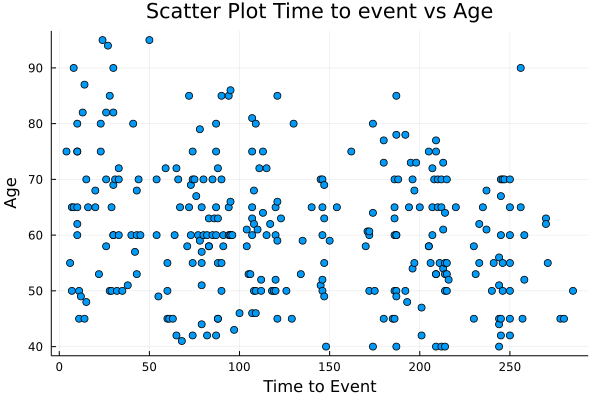

In [10]:
# Correlation Analysis
println("Correlation of time to event with age is ", cor(dataset.time,dataset.age), "\n\n")

# Scatter plot
train_plot = scatter(dataset.time,dataset.age, title = "Scatter Plot Time to event vs Age", ylabel = "Age", xlabel = "Time to Event",legend = false)

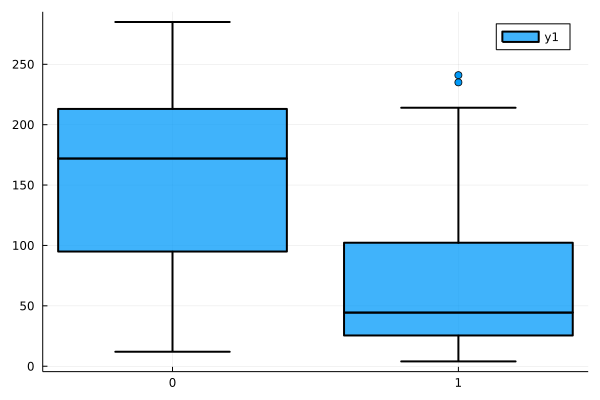

In [11]:
@df dataset boxplot(string.(:DEATH_EVENT), :time, fillalpha=0.75, linewidth=2)


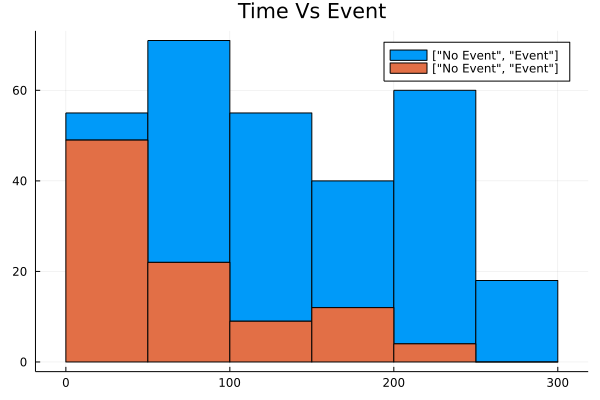

In [12]:
@df dataset groupedhist(:time, group = :DEATH_EVENT, bar_position = :stack,title = "Time Vs Event", label=["No Event","Event"])

In [13]:
schema(dataset)

┌──────────────────────────┬─────────┬────────────┐
│ _.names                  │ _.types │ _.scitypes │
├──────────────────────────┼─────────┼────────────┤
│ age                      │ Float64 │ Continuous │
│ anaemia                  │ Int64   │ Count      │
│ creatinine_phosphokinase │ Int64   │ Count      │
│ diabetes                 │ Int64   │ Count      │
│ ejection_fraction        │ Int64   │ Count      │
│ high_blood_pressure      │ Int64   │ Count      │
│ platelets                │ Float64 │ Continuous │
│ serum_creatinine         │ Float64 │ Continuous │
│ serum_sodium             │ Int64   │ Count      │
│ sex                      │ Int64   │ Count      │
│ smoking                  │ Int64   │ Count      │
│ time                     │ Int64   │ Count      │
│ DEATH_EVENT              │ Int64   │ Count      │
└──────────────────────────┴─────────┴────────────┘
_.nrows = 299


In [14]:
scitype(3.12)


ScientificTypes.Continuous

In [15]:
coerce!(dataset, Count=>MLJ.Continuous);

In [16]:
y,X= unpack(dataset,==(:time),colname -> true);


for mold in models(matching(X, y)) #searching by input and target scitypes
    println(mold.name)
end

ARDRegressor
AdaBoostRegressor
BaggingRegressor
BayesianRidgeRegressor
ConstantRegressor
DecisionTreeRegressor
DecisionTreeRegressor
DeterministicConstantRegressor
DummyRegressor
ElasticNetCVRegressor
ElasticNetRegressor
ElasticNetRegressor
EpsilonSVR
EvoTreeGaussian
EvoTreeRegressor
ExtraTreesRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HuberRegressor
HuberRegressor
KNNRegressor
KNeighborsRegressor
KPLSRegressor
LADRegressor
LGBMRegressor
LarsCVRegressor
LarsRegressor
LassoCVRegressor
LassoLarsCVRegressor
LassoLarsICRegressor
LassoLarsRegressor
LassoRegressor
LassoRegressor
LinearRegressor
LinearRegressor
LinearRegressor
LinearRegressor
NeuralNetworkRegressor
NuSVR
OrthogonalMatchingPursuitCVRegressor
OrthogonalMatchingPursuitRegressor
PLSRegressor
PassiveAggressiveRegressor
QuantileRegressor
RANSACRegressor
RandomForestRegressor
RandomForestRegressor
RandomForestRegressor
RidgeCVRegressor
RidgeRegressor
RidgeRegressor
RidgeRegressor
RobustRegressor
SGDRegressor
SVMLin

In [17]:
schema(dataset)

┌──────────────────────────┬─────────┬────────────┐
│ _.names                  │ _.types │ _.scitypes │
├──────────────────────────┼─────────┼────────────┤
│ age                      │ Float64 │ Continuous │
│ anaemia                  │ Float64 │ Continuous │
│ creatinine_phosphokinase │ Float64 │ Continuous │
│ diabetes                 │ Float64 │ Continuous │
│ ejection_fraction        │ Float64 │ Continuous │
│ high_blood_pressure      │ Float64 │ Continuous │
│ platelets                │ Float64 │ Continuous │
│ serum_creatinine         │ Float64 │ Continuous │
│ serum_sodium             │ Float64 │ Continuous │
│ sex                      │ Float64 │ Continuous │
│ smoking                  │ Float64 │ Continuous │
│ time                     │ Float64 │ Continuous │
│ DEATH_EVENT              │ Float64 │ Continuous │
└──────────────────────────┴─────────┴────────────┘
_.nrows = 299


In [18]:
filter(model) = model.is_supervised &&
                       model.target_scitype >: AbstractVector{MLJ.Continuous} &&
                       model.prediction_type == :deterministic &&
                       model.is_pure_julia ==true
models(filter)

20-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :deep_properties, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :input_scitype, :target_scitype, :output_scitype), T} where T<:Tuple}:
 (name = DecisionTreeRegressor, package_name = BetaML, ... )
 (name = DecisionTreeRegressor, package_name = DecisionTree, ... )
 (name = DeterministicConstantRegressor, package_name = MLJModels, ... )
 (name = ElasticNetRegressor, package_name = MLJLinearModels, ... )
 (name = EvoTreeRegressor, package_name = EvoTrees, ... )
 (name = HuberRegressor, package_name = MLJLinearModels, ... )
 (name = KNNRegressor, package_name = NearestNeighborModels, ... )
 (name = KPLSRegressor, package_name = PartialLeastSquaresRegressor, .

In [19]:
for m in measures()
    println(m.name," --> ",m.target_scitype)
end

Accuracy --> AbstractVector{var"#s1003"} where var"#s1003"<:Finite
AreaUnderCurve --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
BalancedAccuracy --> AbstractVector{var"#s1003"} where var"#s1003"<:Finite
BrierLoss --> AbstractVector{var"#s1003"} where var"#s1003"<:Finite
BrierScore --> AbstractVector{var"#s1003"} where var"#s1003"<:Finite
ConfusionMatrix --> AbstractVector{var"#s1003"} where var"#s1003"<:Finite
FScore --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
FalseDiscoveryRate --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
FalseNegative --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
FalseNegativeRate --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
FalsePositive --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
FalsePositiveRate --> AbstractVector{var"#s1003"} where var"#s1003"<:Binary
LPLoss --> Union{AbstractVector{ScientificTypes.Continuous}, AbstractVector{Count}}
LogCoshLoss --> Union{AbstractVector{ScientificTypes

In [20]:
filter(measure) = measure.target_scitype >: AbstractVector{MLJ.Continuous} 

measures(filter)


15-element Vector{NamedTuple{(:name, :instances, :human_name, :target_scitype, :supports_weights, :supports_class_weights, :prediction_type, :orientation, :reports_each_observation, :aggregation, :is_feature_dependent, :docstring, :distribution_type), T} where T<:Tuple}:
 (name = LPLoss, instances = [l1, l2], ...)
 (name = LogCoshLoss, instances = [log_cosh, log_cosh_loss], ...)
 (name = MeanAbsoluteError, instances = [mae, mav, mean_absolute_error, mean_absolute_value], ...)
 (name = MeanAbsoluteProportionalError, instances = [mape], ...)
 (name = RootMeanSquaredError, instances = [rms, rmse, root_mean_squared_error], ...)
 (name = RootMeanSquaredLogError, instances = [rmsl, rmsle, root_mean_squared_log_error], ...)
 (name = RootMeanSquaredLogProportionalError, instances = [rmslp1], ...)
 (name = RootMeanSquaredProportionalError, instances = [rmsp], ...)
 (name = HuberLoss, instances = [huber_loss], ...)
 (name = L1EpsilonInsLoss, instances = [l1_epsilon_ins_loss], ...)
 (name = L2Eps

In [21]:
train, test = partition(eachindex(y), 0.8,shuffle=true,rng=42)
train_results=Dict();

In [22]:
#KPLS
Random.seed!(1234);
model_lm=(@load LinearRegressor pkg="MLJLinearModels")();
mach_lm=machine(model_lm,X,y)

eval_lm=evaluate!(mach_lm, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[RootMeanSquaredError()],repeats=3)

train_results["linear"] = eval_lm

import MLJLinearModels

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168


 ✔


┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\resampling.jl:343
Evaluating over 30 folds: 100%[=========================] Time: 0:00:08


┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @042 │ 68.3          │ [56.9, 81.5, 75.5, 78.9, 70.8, 6 ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [23]:
#tree

Random.seed!(1234);
model_tree=(@load DecisionTreeRegressor pkg="DecisionTree")()
mach_tree=machine(model_tree,X,y)

eval_tree=evaluate!(mach_tree, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[RootMeanSquaredError()],repeats=3)

train_results["tree"] = eval_tree

import MLJDecisionTreeInterface

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168


 ✔


┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\resampling.jl:343
Evaluating over 30 folds: 100%[=========================] Time: 0:00:01


┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @042 │ 83.8          │ [79.9, 87.9, 102.0, 79.0, 86.6,  ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [24]:
#knn
Random.seed!(1234);
model_knn=(@load KNNRegressor)()
mach_knn=machine(model_knn,X,y)

eval_knn=evaluate!(mach_knn, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[RootMeanSquaredError()],repeats=3)

train_results["knn"] = eval_knn

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168


import NearestNeighborModels ✔


┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\resampling.jl:343
Evaluating over 30 folds: 100%[=========================] Time: 0:00:01


┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @042 │ 87.0          │ [88.0, 80.7, 92.0, 84.3, 83.3, 8 ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [25]:
#knn
Random.seed!(1234);
model_rf=(@load RandomForestRegressor  pkg="DecisionTree")()
mach_rf=machine(model_rf,X,y)

eval_rf=evaluate!(mach_rf, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[RootMeanSquaredError()],repeats=3)

train_results["rf"] =eval_rf 

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168
┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\resampling.jl:343
Evaluating over 30 folds: 100%[=========================] Time: 0:00:00


┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @042 │ 71.2          │ [72.5, 67.6, 74.7, 78.6, 81.6, 6 ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [26]:
#knn
Random.seed!(1234);
model_gb=(@load GradientBoostingRegressor)()
mach_gb=machine(model_gb,X,y)

eval_gb=evaluate!(mach_gb, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[RootMeanSquaredError()],repeats=3)

train_results["gb"] =eval_gb 


import MLJScikitLearnInterface

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168


 ✔


┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\resampling.jl:343
Internal error: encountered unexpected error in runtime:
TypeError(func=:CategoricalValue, context="T", expected=T<:Union{AbstractChar, AbstractString, Number}, got=Any)
jl_type_error_rt at /cygdrive/c/buildbot/worker/package_win64/build/src\rtutils.c:119
check_datatype_parameters at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:1071
inst_datatype_inner at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:1278
inst_type_w_ at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:1686
inst_type_w_ at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:1678
inst_type_w_ at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:1638
jl_instantiate_unionall at /cygdrive/c/buildbot/worker/package_win64/build/src\jltypes.c:898 [inlined]
normalize_unionalls at /cygdrive/c/buildbot/worker/package_win64/build/

┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @042 │ 73.6          │ [67.6, 81.7, 83.2, 86.1, 79.8, 7 ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [27]:
int= [confint(OneSampleTTest(train_results["knn"].per_fold[1])), confint(OneSampleTTest(train_results["rf"].per_fold[1])),confint(OneSampleTTest(train_results["gb"].per_fold[1]))
,confint(OneSampleTTest(train_results["tree"].per_fold[1])),confint(OneSampleTTest(train_results["linear"].per_fold[1]))];
results= [eval_knn.measurement[1], eval_rf.measurement[1],eval_gb.measurement[1],eval_tree.measurement[1],eval_lm.measurement[1]];
int1=[i[1] for i in int]
int2=[i[2] for i in int]

5-element Vector{Float64}:
 89.55172232439377
 73.74782212933744
 76.24237162712329
 86.5846606951319
 70.87984950895803

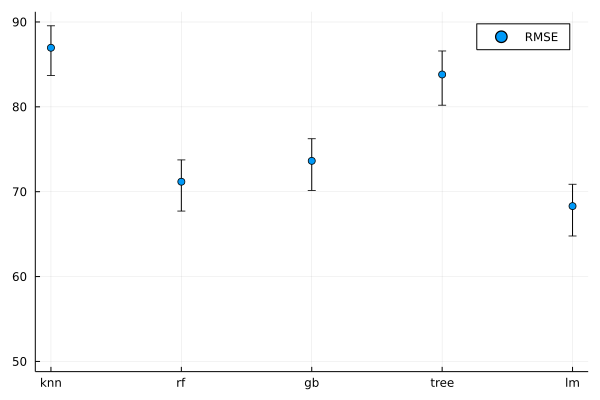

In [36]:
scatter(["knn", "rf", "gb", "tree", "lm"],results,yerror=(results-int1,int2-results),ylims=[50,90],label="RMSE")

In [29]:
#knn
Random.seed!(1234);
final_model=(@load LinearRegressor  pkg="MLJLinearModels")()
final_mach=machine(final_model,X,y)
fit!(final_mach,rows=train)
ŷ = MLJ.predict(final_mach, rows=test)


import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\joaof\.julia\packages\MLJModels\w0uSt\src\loading.jl:168
┌ Info: Training Machine{LinearRegressor,…} @380.
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\KWyqX\src\machines.jl:342


60-element Vector{Float64}:
 142.35739944031923
 160.24178541919412
 154.54200891184215
 164.66224258653196
 164.0639852928149
 183.8993340173513
 113.50232511820967
 136.80358270245364
  83.3141372136806
 160.44323241399354
 123.80006950746153
 130.94672291194672
 161.18144369628857
   ⋮
 181.28007160609357
 173.1809804642328
 171.90567625131234
  97.03281008486056
  66.0001794554058
  35.81228694341718
 129.4738229940749
 163.04325814904954
 144.83042002052974
 174.43652234988986
 164.55834559439364
 162.40550111906526

In [30]:
fitted_params(final_mach)

(coefs = [:age => -0.5600676786856139, :anaemia => -17.379451678818782, :creatinine_phosphokinase => -0.0024220637584861492, :diabetes => 5.5623104572596525, :ejection_fraction => -0.4719281676537811, :high_blood_pressure => -23.336061031579977, :platelets => -2.9328265873457684e-5, :serum_creatinine => 1.80232687559864, :serum_sodium => 0.06127126459720784, :sex => -3.8716177684193114, :smoking => -6.7752701233783705, :DEATH_EVENT => -86.69157019555797],
 intercept = 226.6056333198319,)

In [31]:
println("MAE: ",mae(ŷ, y[test]))
println("RMSE: ",rmse(ŷ, y[test]))
println("RMSP: ",rmsp(ŷ, y[test]))
println("MAPE: ",mape(ŷ, y[test]))

MAE: 51.26912864372159
RMSE: 59.80738088464344
RMSP: 2.398347880392765
MAPE: 0.9529914417765525


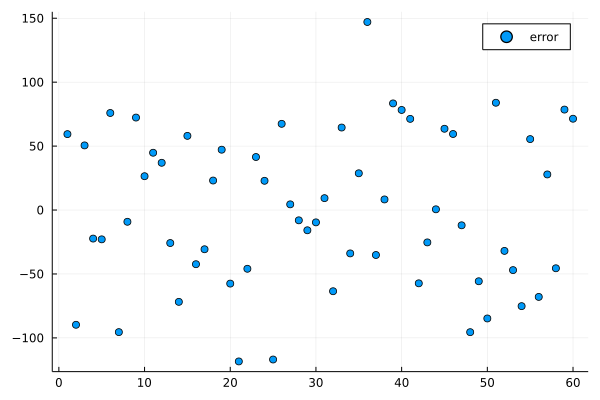

In [32]:
scatter(ŷ- y[test],label="error")

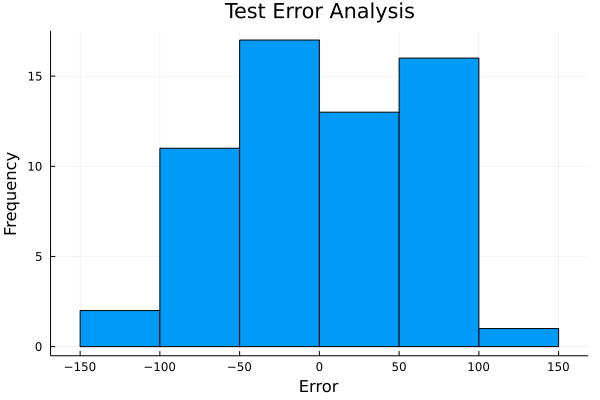

In [33]:
histogram(ŷ- y[test], bins = 5, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)


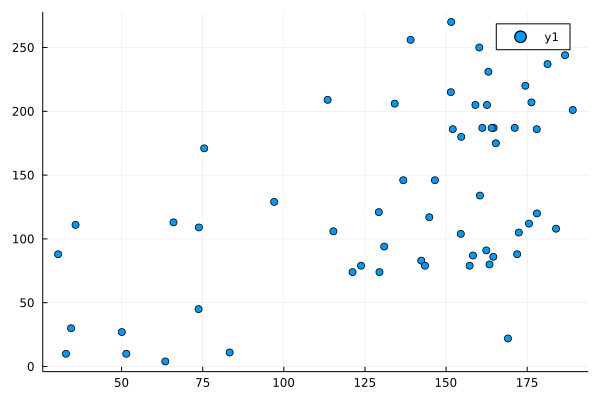

In [34]:
scatter(ŷ, y[test])